<a href="https://colab.research.google.com/github/alemskdlt/dl02/blob/main/project/dl02_prj03_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN
## MNIST

In [8]:
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0


model = models.Sequential()
# CNN
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# DNN
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


(60000, 28, 28, 1) (60000,)


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

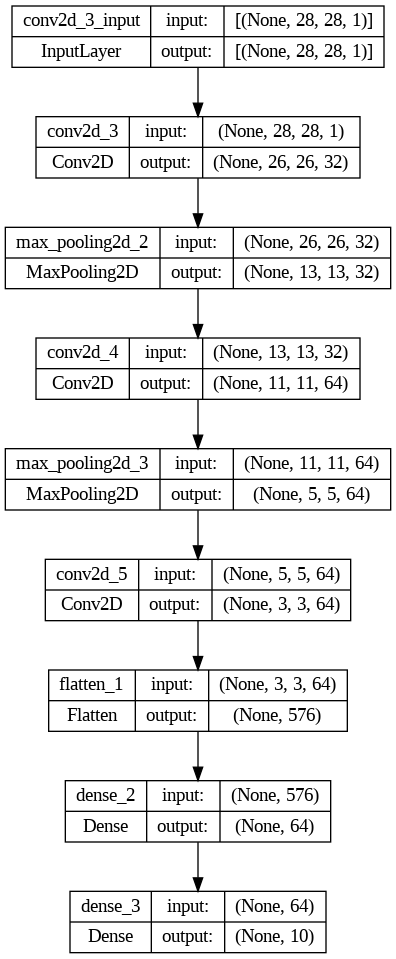

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1480 - accuracy: 0.9546
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0481 - accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0208 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0146 - accuracy: 0.9952
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0111 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0106 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.008

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2470 - accuracy: 0.9277 - val_loss: 0.1288 - val_accuracy: 0.9602
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1034 - accuracy: 0.9687 - val_loss: 0.1151 - val_accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0743 - accuracy: 0.9773 - val_loss: 0.0860 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0551 - accuracy: 0.9822 - val_loss: 0.0928 - val_accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0425 - accuracy: 0.9865 - val_loss: 0.0854 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.0799 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0875 - val_accuracy:

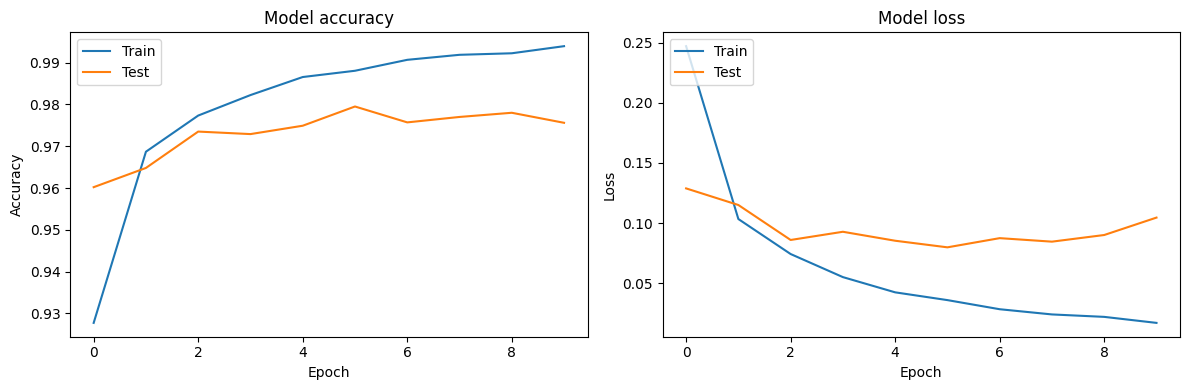

In [15]:
#
# [DIY-1] training history를 이용홰서 loss와 accuracy 그래프 그리기
#

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
#
# [DIY-2] test 데이터에 모델 적용하고 정확도 계산
#
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


313/313 - 1s - loss: 0.1046 - accuracy: 0.9756 - 595ms/epoch - 2ms/step
Test accuracy: 0.975600004196167
Test loss: 0.10459102690219879


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2348 - accuracy: 0.9301 - val_loss: 0.1261 - val_accuracy: 0.9624
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0983 - accuracy: 0.9703 - val_loss: 0.0936 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0702 - accuracy: 0.9786 - val_loss: 0.0921 - val_accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0782 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0438 - accuracy: 0.9856 - val_loss: 0.0830 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0341 - accuracy: 0.9886 - val_loss: 0.0839 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0896 - val_accuracy:

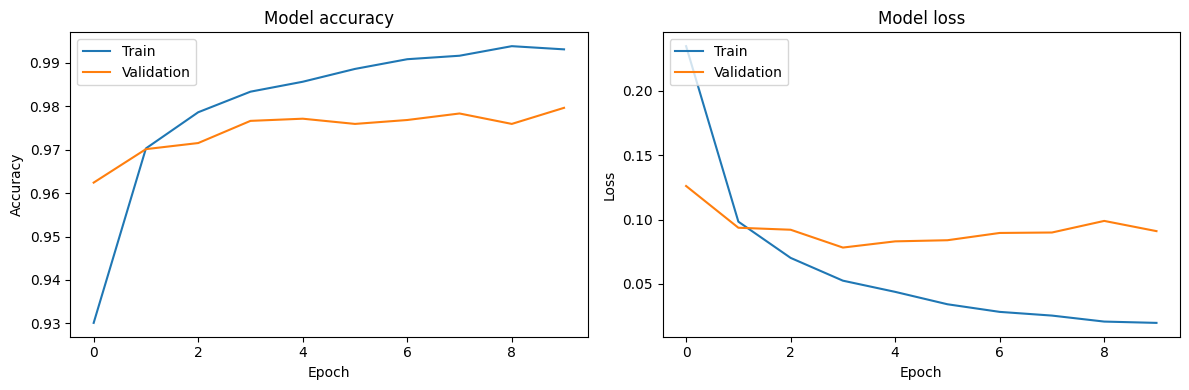

In [20]:
#
# [Prj-3] test 데이터를 validation으로 설정해서 모델을 다시 훈련시키시오.
# 그리고 training history를 이용해서 loss, val_loss와 accuracy, val-accuracy 그래프 그리기
# file name: dlxx_prj03_CNN_MNIST.ipynb
# 깃허브의 project 폴더에 저장하시오.
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with test data as validation data
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
